In [5]:
# Importar librerías

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [6]:
#carga del dataset
#Se lee el archivo
pdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
raw_dir = os.path.join(pdir,"data","raw")
data_dir = os.path.join(raw_dir,"dengue_data_all_municipalities.csv")

dengue_df  = pd.read_csv(data_dir)
dengue_df.head()

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,29,17,35,16,21,15,20,30,14,5
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,0,0,0,0,0,1,1,1,0,0


In [7]:
data_dir2 = os.path.join(raw_dir,"Dengue_Dataset(Medellin).csv")

df_medellin = pd.read_csv(data_dir2)
df_medellin.head()

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,precipitation_medellin,precipitation_medellin_rural,precipitation_medellin_urbano,temperature
0,1,"['2007', 'w01']",2007,200701,2007-01-06,1,13.096688,14.097693,12.628933,19.615357
1,0,"['2007', 'w02']",2007,200702,2007-01-13,1,8.437044,6.910390,9.067214,22.234000
2,0,"['2007', 'w03']",2007,200703,2007-01-20,1,19.373165,21.616968,18.406665,22.268857
3,0,"['2007', 'w04']",2007,200704,2007-01-27,1,0.000000,0.000000,0.000000,23.546000
4,0,"['2007', 'w05']",2007,200705,2007-02-03,2,3.725206,3.144225,3.901021,25.353071


In [8]:
dengue_df[dengue_df.isnull().sum()[dengue_df.isnull().sum() >0].index].isnull()

,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,...,PRECIPITATION_mar_18,PRECIPITATION_apr_18,PRECIPITATION_may_18,PRECIPITATION_jun_18,PRECIPITATION_jul_18,PRECIPITATION_aug_18,PRECIPITATION_sep_18,PRECIPITATION_oct_18,PRECIPITATION_nov_18,PRECIPITATION_dec_18
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
dengue_df[[	"Municipality code","Municipality","Population2007","Population2019", "Cases2007", "Cases2019", "Age0-4(%)", "TEMPERATURE_aug_07", "PRECIPITATION_jun_16" ]]

,Municipality code,Municipality,Population2007,Population2019,Cases2007,Cases2019,Age0-4(%),TEMPERATURE_aug_07,PRECIPITATION_jun_16
0,5001,Medellín,2286126,2483545,5,1276,5.16,20.866394,118.415253
1,5002,Abejorral,20643,20258,0,0,5.24,16.154948,104.822426
2,5004,Abriaquí,2261,2710,0,2,6.07,16.717581,122.545334
3,5021,Alejandría,3935,4669,0,0,6.59,20.634999,115.304100
4,5030,Amagá,27996,30777,0,16,5.42,20.447760,107.121597
...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,555,1067,0,0,5.03,25.017467,371.538391
1117,99001,Puerto Carreño,13742,20474,53,214,10.61,27.009569,450.518494
1118,99524,La Primavera,5190,9799,32,92,10.37,26.512006,427.580719
1119,99624,Santa Rosalía,3167,4130,12,31,9.34,25.768856,456.706573


In [10]:
dengue_df = dengue_df.drop(['Municipality code'], axis=1)

In [11]:
print('Las dimensiones del dataframe son:', dengue_df.shape)

Las dimensiones del dataframe son: (1121, 1016)


In [12]:
#Describe de los datos
df_numerico = dengue_df._get_numeric_data()
df_estadisticas = df_numerico.describe()
df_estadisticas

,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,Population2016,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
count,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,1.121000e+03,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,3.830083e+04,3.872660e+04,3.914528e+04,3.956012e+04,3.995886e+04,4.033605e+04,4.069779e+04,4.105313e+04,4.141868e+04,4.183696e+04,...,2.343443,2.434434,2.671722,2.569135,2.581624,2.495094,2.666369,2.701160,2.350580,1.009813
std,2.349465e+05,2.372341e+05,2.394122e+05,2.415079e+05,2.434845e+05,2.452775e+05,2.466488e+05,2.476931e+05,2.485725e+05,2.496816e+05,...,9.854693,10.498020,11.840804,11.089043,11.337705,10.704648,11.896699,11.977244,10.618768,4.849788
min,0.000000e+00,1.270000e+02,1.270000e+02,1.290000e+02,1.440000e+02,1.590000e+02,1.720000e+02,1.920000e+02,2.100000e+02,2.240000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.373000e+03,6.505000e+03,6.583000e+03,6.632000e+03,6.689000e+03,6.586000e+03,6.496000e+03,6.520000e+03,6.433000e+03,6.428000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.200400e+04,1.220600e+04,1.232500e+04,1.252800e+04,1.260300e+04,1.256800e+04,1.267200e+04,1.267900e+04,1.268000e+04,1.271500e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.422200e+04,2.464200e+04,2.483100e+04,2.516200e+04,2.548000e+04,2.570500e+04,2.595700e+04,2.627200e+04,2.633500e+04,2.626400e+04,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.866363e+06,6.936977e+06,7.003434e+06,7.065669e+06,7.119281e+06,7.162261e+06,7.197326e+06,7.226652e+06,7.253823e+06,7.290415e+06,...,146.000000,174.000000,174.000000,182.000000,187.000000,186.000000,212.000000,223.000000,242.000000,109.000000


In [13]:
#Extrayendo únicamente los columnas que contienen el conteo de casos de todos los municipios entre los años 2007-2019
casos_df = dengue_df.iloc[:,14:27] 
casos_df

,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,5,902,413,15570,802,713,2342,3161,3785,17306,2100,1172,1276
1,0,1,0,79,1,0,0,0,2,5,1,2,0
2,0,0,0,3,0,0,0,0,0,2,0,1,2
3,0,0,0,5,0,0,1,0,0,5,0,0,0
4,0,2,1,297,13,3,3,3,120,196,17,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0,0,0,0,1,0,0,1,0,0,0,0,0
1117,53,114,39,199,198,53,118,40,27,32,5,5,214
1118,32,20,8,41,3,8,48,22,25,72,0,3,92
1119,12,3,1,51,16,20,54,35,15,14,9,0,31


In [14]:
#suma de casos para cada año desde 2007 - 2019
columnas_casos = casos_df.columns.tolist()
suma_casos_año = [sum(casos_df[col]) for col in columnas_casos]
print(suma_casos_año)

[40974, 36078, 51946, 155254, 29878, 53489, 124693, 104775, 95841, 99976, 25048, 43504, 126840]


In [15]:
columns = casos_df.columns


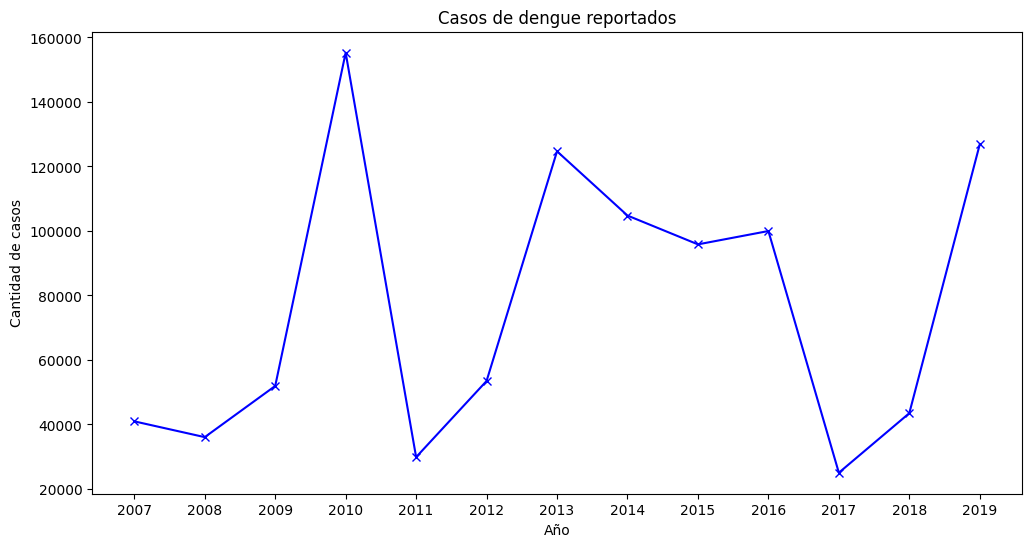

In [16]:
#comportamiento anual de casos totales de dengue
plt.figure(figsize=(12,6))
arr = np.arange(2020)
x = arr[2007:2020]
y = suma_casos_año
plt.plot(x,y,"xb-")
plt.ylabel("Cantidad de casos")
plt.xlabel("Año")
plt.xticks(range(2007,2020,1))
plt.title("Casos de dengue reportados")
plt.show()

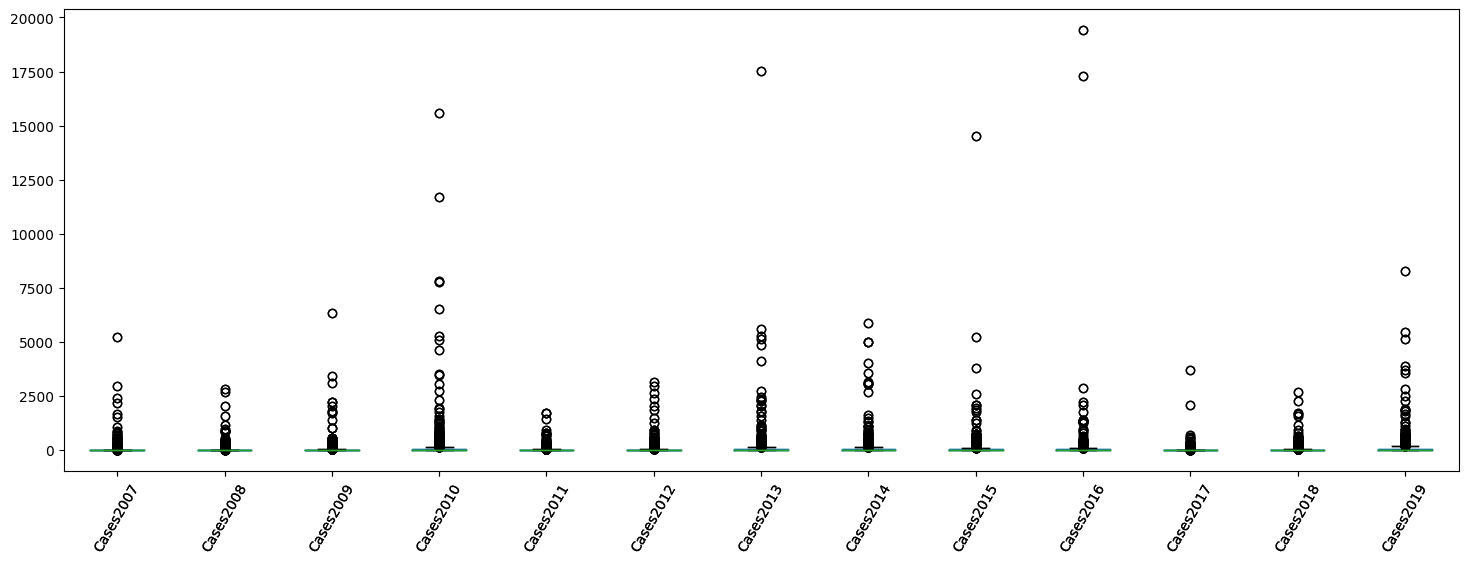

In [17]:
# Boxplot de la cantidad de casos reportados por año 2007-2019
plt.figure(figsize=(18,6))
boxplot = casos_df.boxplot(column=['Cases2007', 'Cases2008', 'Cases2009', 'Cases2010', 'Cases2011',
       'Cases2012', 'Cases2013', 'Cases2014', 'Cases2015', 'Cases2016',
       'Cases2017', 'Cases2018', 'Cases2019'], return_type='axes')
boxplot = casos_df.boxplot(grid=False, rot=60, fontsize=10) 


In [18]:
poblacion_df = dengue_df.iloc[:,1:14] #Extrayendo únicamente los columnas que contienen el conteo de habitantes de todos los municipios
poblacion_df

,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,Population2016,Population2017,Population2018,Population2019
0,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,2431666,2420516,2414616,2427129,2483545
1,20643,20944,21197,21355,20973,20067,19732,19796,19897,19979,20047,20367,20258
2,2261,2290,2321,2353,2386,2424,2471,2488,2514,2539,2593,2695,2710
3,3935,4020,4096,4171,4244,4337,4419,4467,4511,4543,4570,4657,4669
4,27996,28331,28624,28839,28776,28371,28259,28432,28691,29006,29429,30227,30777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,555,693,841,1003,1164,1275,1349,1334,1212,1073,1027,1048,1067
1117,13742,14559,15346,16124,16934,17773,18635,19519,20319,20921,21087,20936,20474
1118,5190,5784,6365,6920,7496,8034,8617,9166,9694,10098,10233,10122,9799
1119,3167,3378,3586,3846,4067,4325,4535,4635,4551,4296,4083,4059,4130


In [19]:
#totalidad de población entre los años 2007-2019
columnas_poblacion = poblacion_df.columns.tolist()
suma_poblacion_año = [sum(poblacion_df[col]) for col in columnas_poblacion]
print(suma_poblacion_año)

[42935229, 43412524, 43881857, 44346893, 44793884, 45216709, 45622225, 46020558, 46430337, 46899231, 47406658, 48257472, 49394630]


In [20]:
#tasa de incidencia: porcentaje de casos respecto a la poblacion del municipio entre los años 2007-2019
tasa_incidencia = np.divide(suma_casos_año, suma_poblacion_año)*100
print(tasa_incidencia)


[0.09543212 0.08310505 0.11837694 0.35008991 0.06670107 0.11829477
 0.27331635 0.22766999 0.20641892 0.21317194 0.05283646 0.09014977
 0.25678905]


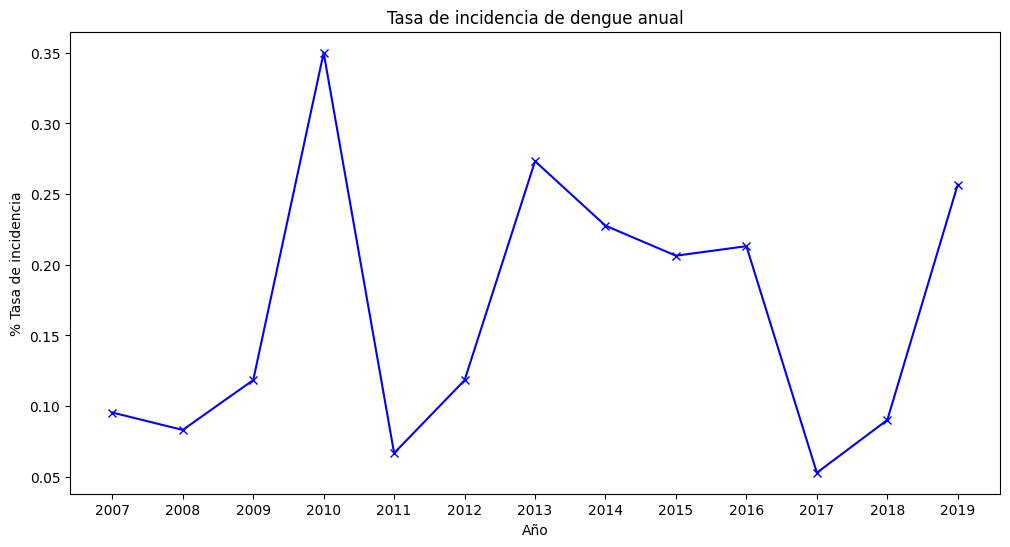

In [21]:

plt.figure(figsize=(12,6))
arr = np.arange(2020)
x = arr[2007:2020]
y = tasa_incidencia
plt.plot(x,y,"xb-")
plt.ylabel("% Tasa de incidencia")
plt.xlabel("Año")
plt.xticks(range(2007,2020,1))
plt.title("Tasa de incidencia de dengue anual")
plt.show()

In [22]:
#Extrayendo las columnas que reportan los casos por semanas epidemiológicas
casos_meses_df = dengue_df.iloc[:,340:499] 
casos_meses_df

,2007/w01,2007/w02,2007/w03,2007/w04,2007/w05,2007/w06,2007/w07,2007/w08,2007/w09,2007/w10,...,2009/w46,2009/w47,2009/w48,2009/w49,2009/w50,2009/w51,2009/w52,2010/w01,2010/w02,2010/w03
0,1,0,0,0,0,0,0,0,0,0,...,15,12,26,16,24,21,16,30,36,37
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1117,0,1,1,2,2,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
1118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from numpy.core.fromnumeric import size
x = casos_meses_df.columns
array = np.array(x)
suma_casos_meses = [sum(casos_meses_df[col]) for col in casos_meses_df]



Text(0.5, 1.0, 'Casos de dengue reportados mensualmente a nivel nacional')

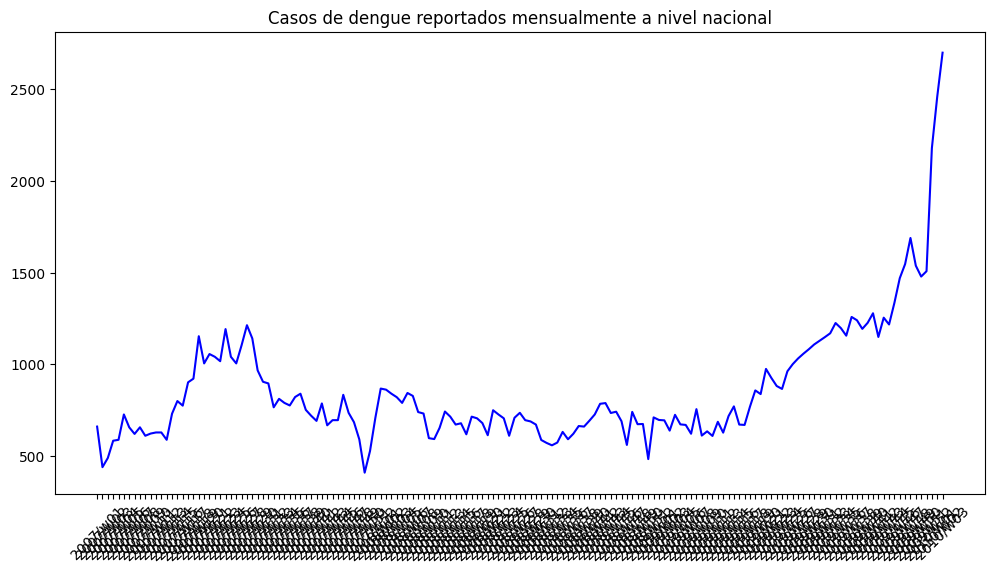

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
y = suma_casos_meses
plt.plot(x,y,"b-")
plt.title("Casos de dengue reportados mensualmente a nivel nacional")

In [25]:
#Extrayendo las columnas que reportan la temperatura por meses desde ene 2007 hasta dic 2018
tem_mes_df = dengue_df.iloc[:,52:196] 
tem_mes_df

,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,...,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18
0,21.009283,20.982925,21.425911,21.237032,21.322522,21.243176,21.686978,20.866394,20.705536,19.954406,...,21.726171,21.124271,21.037365,21.457151,21.952168,21.719432,21.347202,20.748416,20.886703,20.936353
1,16.566818,16.545661,16.853578,16.592266,16.764218,16.744885,16.738302,16.154948,16.318124,15.558375,...,17.169984,16.471953,16.495468,17.036293,17.063302,17.103385,17.011875,16.495094,16.674297,16.627245
2,16.988332,16.940564,17.444237,17.463490,17.461414,17.357063,17.557740,16.717581,16.753113,16.142443,...,17.833994,17.378247,17.221657,17.529025,17.843157,17.512112,17.356325,16.911367,17.231535,17.080420
3,20.606707,20.672624,21.210392,21.113854,21.331241,21.114738,21.333450,20.634999,20.499266,19.855212,...,21.489558,20.985991,21.025772,21.377411,21.652374,21.425886,21.230342,20.725872,20.687894,20.574121
4,20.814870,20.851651,21.328261,21.144019,21.174519,20.900712,21.281823,20.447760,20.407709,19.706597,...,21.648314,21.020582,20.880769,21.149931,21.560988,21.380573,21.026458,20.558420,20.625113,20.717262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,26.708149,27.050801,26.316475,26.150623,25.452312,25.064161,24.929709,25.017467,25.766627,25.762292,...,26.505539,25.702706,25.167677,25.276139,25.008356,25.352882,26.116107,26.381042,26.529586,26.300149
1117,29.710881,30.431314,30.537816,29.317689,28.358616,27.334923,27.086235,27.009569,27.368171,27.976620,...,29.914727,28.625936,27.245942,26.710096,26.794482,27.001324,27.557754,27.757870,28.391361,28.290137
1118,29.076091,29.464032,29.480690,28.325781,27.578315,26.635199,26.743574,26.512006,27.085120,27.312293,...,29.391974,27.948265,26.860780,26.380163,26.470571,26.864957,27.489720,27.587379,28.106454,28.010822
1119,28.356804,28.866877,28.733139,27.563194,26.854834,25.773636,25.887431,25.768856,26.433393,26.599324,...,28.906054,27.354861,26.131048,25.852802,25.822849,26.348023,27.013428,27.146027,27.544563,27.512444


In [26]:
#Extrayendo las columnas que reportan la precipitación por meses desde ene 2007 hasta dic 2018
preci_mes_df = dengue_df.iloc[:,196:340] 
preci_mes_df.mean().reset_index()

,index,0
0,PRECIPITATION_jan_07,58.939316
1,PRECIPITATION_feb_07,43.138888
2,PRECIPITATION_mar_07,140.990806
3,PRECIPITATION_apr_07,280.646100
4,PRECIPITATION_may_07,271.626818
...,...,...
139,PRECIPITATION_aug_18,149.250247
140,PRECIPITATION_sep_18,186.633616
141,PRECIPITATION_oct_18,271.943875
142,PRECIPITATION_nov_18,196.227458


In [27]:
[188.727515, 224.6447, 160.751813 ]

[188.727515, 224.6447, 160.751813]

In [28]:
print(preci_mes_df.mean().reset_index().iloc[36:48,:].mean())
preci_mes_df.mean().reset_index().iloc[36:48,:]

0    216.956769
dtype: float64


C:\Users\franc\AppData\Local\Temp\ipykernel_22040\1616296818.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(preci_mes_df.mean().reset_index().iloc[36:48,:].mean())


,index,0
36,PRECIPITATION_jan_10,22.250427
37,PRECIPITATION_feb_10,63.594335
38,PRECIPITATION_mar_10,99.546413
39,PRECIPITATION_apr_10,295.276152
40,PRECIPITATION_may_10,298.456317
41,PRECIPITATION_jun_10,269.745699
42,PRECIPITATION_jul_10,251.179277
43,PRECIPITATION_aug_10,179.639421
44,PRECIPITATION_sep_10,262.455671
45,PRECIPITATION_oct_10,254.102611


In [29]:
[x for x in preci_mes_df.mean().reset_index()  ]

['index', 0]

In [30]:
[]

[]

In [31]:
df_estadisticas_tem = tem_mes_df.describe()
df_estadisticas_tem 

,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,...,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,...,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,21.341494,21.369348,21.624123,21.427352,21.394515,20.985997,21.221093,20.691514,20.881906,20.394404,...,21.909892,21.321328,21.253347,21.282962,21.535259,21.546901,21.557522,21.255658,21.368144,21.347664
std,5.690491,5.789500,5.813286,5.737872,5.670817,5.830323,5.945628,5.843421,5.731512,5.622461,...,5.741662,5.714293,5.596556,5.723580,5.868096,5.778783,5.702190,5.538864,5.535728,5.610472
min,3.927416,3.718099,4.207906,4.065408,4.029660,3.317243,2.965087,2.681081,3.291453,3.387867,...,4.317282,3.887283,3.471066,3.404483,2.927327,3.381603,3.892235,3.970158,4.306131,4.183894
25%,17.045011,17.027510,17.274697,17.109960,17.248967,16.751721,17.072500,16.426404,16.645450,16.118646,...,17.558010,16.973790,17.071008,17.081442,17.333293,17.261581,17.322357,17.038166,17.125349,17.057504
50%,21.795407,21.870771,22.119152,21.881226,21.893436,21.486656,22.081644,21.316279,21.413619,20.775802,...,22.416773,21.765229,21.771181,21.884009,22.476355,22.202146,22.127749,21.634492,21.672488,21.834375
75%,26.950056,27.071090,27.145190,26.780102,26.670794,26.111782,26.218060,25.890016,26.220641,25.947726,...,27.380697,26.639163,26.407910,26.348177,26.617457,26.589537,26.820132,26.733839,26.870083,26.829089
max,29.710881,30.431314,30.537816,29.604315,30.158815,30.600778,30.807735,30.164066,29.779350,28.815366,...,30.129071,29.420981,29.578173,30.500952,30.539854,30.806860,30.257563,29.229948,29.008523,28.674008


In [32]:
#Hallando la tasa de incidencia para todos los municipios
tasa = np.divide(casos_df,poblacion_df)*100
tasa

C:\Users\franc\AppData\Local\Temp\ipykernel_22040\3960642710.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tasa = np.divide(casos_df,poblacion_df)*100


,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,0.000219,0.039053,0.017715,0.661593,0.033699,0.029584,0.096424,0.129758,0.155655,0.714972,0.086970,0.048288,0.051378
1,0.000000,0.004775,0.000000,0.369937,0.004768,0.000000,0.000000,0.000000,0.010052,0.025026,0.004988,0.009820,0.000000
2,0.000000,0.000000,0.000000,0.127497,0.000000,0.000000,0.000000,0.000000,0.000000,0.078771,0.000000,0.037106,0.073801
3,0.000000,0.000000,0.000000,0.119875,0.000000,0.000000,0.022630,0.000000,0.000000,0.110059,0.000000,0.000000,0.000000
4,0.000000,0.007059,0.003494,1.029855,0.045177,0.010574,0.010616,0.010551,0.418250,0.675722,0.057766,0.009925,0.051987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.000000,0.000000,0.000000,0.000000,0.085911,0.000000,0.000000,0.074963,0.000000,0.000000,0.000000,0.000000,0.000000
1117,0.385679,0.783021,0.254138,1.234185,1.169245,0.298205,0.633217,0.204929,0.132881,0.152956,0.023711,0.023882,1.045228
1118,0.616570,0.345781,0.125687,0.592486,0.040021,0.099577,0.557038,0.240017,0.257891,0.713012,0.000000,0.029638,0.938871
1119,0.378907,0.088810,0.027886,1.326053,0.393410,0.462428,1.190739,0.755124,0.329598,0.325885,0.220426,0.000000,0.750605


In [33]:
#Extrayendo las tasas de incidencia mas altas para cada año
maxValues = tasa.max() 
print(maxValues) 

Cases2007     3.381722
Cases2008     3.361207
Cases2009     4.202780
Cases2010    13.982664
Cases2011     4.812563
Cases2012     1.783233
Cases2013     5.515766
Cases2014     3.337362
Cases2015     3.117884
Cases2016     4.631143
Cases2017     2.568159
Cases2018     1.662638
Cases2019     4.761246
dtype: float64


In [34]:
# Id de los municipios con la tasa de incidencia mas alta para cada año
id_tasa_max = tasa.idxmax()
id_tasa_max

Cases2007     372
Cases2008     372
Cases2009     372
Cases2010    1050
Cases2011     372
Cases2012     418
Cases2013     518
Cases2014     518
Cases2015     823
Cases2016     289
Cases2017     518
Cases2018    1109
Cases2019     996
dtype: int64

In [35]:
id_unicos = id_tasa_max.unique()
id_unicos

array([ 372, 1050,  418,  518,  823,  289, 1109,  996], dtype=int64)

In [36]:
# Municipios con mayor tasa de incidencia en cada año de medición
municipios_max = np.array(id_tasa_max)
municipios_max = municipios_max.astype(int)
for i in range(0,13):
  nombres_mun = dengue_df.iloc[municipios_max[i]].Municipality
  print(nombres_mun)


Florencia
Florencia
Florencia
Fortul
Florencia
Manaure Balcón del Cesar
Nilo
Nilo
Córdoba
Soatá
Nilo
El Retorno
Saldaña


In [37]:
#Información de los municipios encontrados con tasas mas altas de incidencia, para encontrar características en comun
pd.options.display.max_columns = None
municipios_cifras = dengue_df[dengue_df.index.isin([372, 1050,  418,  518,  823,  289, 1109,  996])]
municipios_cifras

,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,Population2016,Population2017,Population2018,Population2019,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019,Age0-4(%),Age5-14(%),Age15-29(%),Age>30(%),AfrocolombianPopulation(%),IndianPopulation(%),PeoplewithDisabilities(%),Peoplewhocannotreadorwrite(%),Secondary/HigherEducation(%),Employedpopulation(%),Unemployedpopulation(%),Peopledoinghousework(%),Retiredpeople(%),Men(%),Women(%),Householdswithoutwateraccess(%),Householdswithoutinternetaccess(%),Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,TEMPERATURE_nov_07,TEMPERATURE_dec_07,TEMPERATURE_jan_08,TEMPERATURE_feb_08,TEMPERATURE_mar_08,TEMPERATURE_apr_08,TEMPERATURE_may_08,TEMPERATURE_jun_08,TEMPERATURE_jul_08,TEMPERATURE_aug_08,TEMPERATURE_sep_08,TEMPERATURE_oct_08,TEMPERATURE_nov_08,TEMPERATURE_dec_08,TEMPERATURE_jan_09,TEMPERATURE_feb_09,TEMPERATURE_mar_09,TEMPERATURE_apr_09,TEMPERATURE_may_09,TEMPERATURE_jun_09,TEMPERATURE_jul_09,TEMPERATURE_aug_09,TEMPERATURE_sep_09,TEMPERATURE_oct_09,TEMPERATURE_nov_09,TEMPERATURE_dec_09,TEMPERATURE_jan_10,TEMPERATURE_feb_10,TEMPERATURE_mar_10,TEMPERATURE_apr_10,TEMPERATURE_may_10,TEMPERATURE_jun_10,TEMPERATURE_jul_10,TEMPERATURE_aug_10,TEMPERATURE_sep_10,TEMPERATURE_oct_10,TEMPERATURE_nov_10,TEMPERATURE_dec_10,TEMPERATURE_jan_11,TEMPERATURE_feb_11,TEMPERATURE_mar_11,TEMPERATURE_apr_11,TEMPERATURE_may_11,TEMPERATURE_jun_11,TEMPERATURE_jul_11,TEMPERATURE_aug_11,TEMPERATURE_sep_11,TEMPERATURE_oct_11,TEMPERATURE_nov_11,TEMPERATURE_dec_11,TEMPERATURE_jan_12,TEMPERATURE_feb_12,TEMPERATURE_mar_12,TEMPERATURE_apr_12,TEMPERATURE_may_12,TEMPERATURE_jun_12,TEMPERATURE_jul_12,TEMPERATURE_aug_12,TEMPERATURE_sep_12,TEMPERATURE_oct_12,TEMPERATURE_nov_12,TEMPERATURE_dec_12,TEMPERATURE_jan_13,TEMPERATURE_feb_13,TEMPERATURE_mar_13,TEMPERATURE_apr_13,TEMPERATURE_may_13,TEMPERATURE_jun_13,TEMPERATURE_jul_13,TEMPERATURE_aug_13,TEMPERATURE_sep_13,TEMPERATURE_oct_13,TEMPERATURE_nov_13,TEMPERATURE_dec_13,TEMPERATURE_jan_14,TEMPERATURE_feb_14,TEMPERATURE_mar_14,TEMPERATURE_apr_14,TEMPERATURE_may_14,TEMPERATURE_jun_14,TEMPERATURE_jul_14,TEMPERATURE_aug_14,TEMPERATURE_sep_14,TEMPERATURE_oct_14,TEMPERATURE_nov_14,TEMPERATURE_dec_14,TEMPERATURE_jan_15,TEMPERATURE_feb_15,TEMPERATURE_mar_15,TEMPERATURE_apr_15,TEMPERATURE_may_15,TEMPERATURE_jun_15,TEMPERATURE_jul_15,TEMPERATURE_aug_15,TEMPERATURE_sep_15,TEMPERATURE_oct_15,TEMPERATURE_nov_15,TEMPERATURE_dec_15,TEMPERATURE_jan_16,TEMPERATURE_feb_16,TEMPERATURE_mar_16,TEMPERATURE_apr_16,TEMPERATURE_may_16,TEMPERATURE_jun_16,TEMPERATURE_jul_16,TEMPERATURE_aug_16,TEMPERATURE_sep_16,TEMPERATURE_oct_16,TEMPERATURE_nov_16,TEMPERATURE_dec_16,TEMPERATURE_jan_17,TEMPERATURE_feb_17,TEMPERATURE_mar_17,TEMPERATURE_apr_17,TEMPERATURE_may_17,TEMPERATURE_jun_17,TEMPERATURE_jul_17,TEMPERATURE_aug_17,TEMPERATURE_sep_17,TEMPERATURE_oct_17,TEMPERATURE_nov_17,TEMPERATURE_dec_17,TEMPERATURE_jan_18,TEMPERATURE_feb_18,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,PRECIPITATION_sep_07,PRECIPITATION_oct_07,PRECIPITATION_nov_07,PRECIPITATION_dec_07,PRECIPITATION_jan_08,PRECIPITATION_feb_08,PRECIPITATION_mar_08,PRECIPITATION_apr_08,PRECIPITATION_may_08,PRECIPITATION_ju

In [38]:
# Comparando las estadísticas generales del dataset con las cifras de los municipio con tasas de incidencia mas latas
df_numerico_muni = municipios_cifras._get_numeric_data()
comparacion_est = pd.concat([df_numerico_muni, df_estadisticas], axis=0)
comparacion_est

Population2007  Population2008  Population2009  Population2010  \
289      9.218000e+03    9.252000e+03    9.262000e+03    9.260000e+03   
372      6.062000e+03    6.099000e+03    6.115000e+03    6.078000e+03   
418      7.745000e+03    7.939000e+03    8.112000e+03    8.283000e+03   
518      1.207500e+04    1.194000e+04    1.197300e+04    1.199200e+04   
823      5.584000e+03    5.638000e+03    5.702000e+03    5.720000e+03   
996      1.453300e+04    1.443900e+04    1.441100e+04    1.439000e+04   
1050     3.789000e+03    3.964000e+03    4.153000e+03    4.384000e+03   
1109     3.300000e+03    3.387000e+03    3.517000e+03    3.703000e+03   
count    1.121000e+03    1.121000e+03    1.121000e+03    1.121000e+03   
mean     3.830083e+04    3.872660e+04    3.914528e+04    3.956012e+04   
std      2.349465e+05    2.372341e+05    2.394122e+05    2.415079e+05   
min      0.000000e+00    1.270000e+02    1.270000e+02    1.290000e+02   
25%      6.373000e+03    6.505000e+03    6.583000e+03    6.632000e+03   
50%      1.200400e+04    1.220600e+04    1.232500e+04    1.252800e+04   
75%      2.422200e+04    2.464200e+04    2.483100e+04    2.516200e+04   
max      6.866363e+06    6.936977e+06    7.003434e+06    7.065669e+06   

       Population2011  Population2012  Population2013  Population2014  \
289      9.261000e+03    9.242000e+03    9.226000e+03    9.220000e+03   
372      5.922000e+03    5.667000e+03    5.387000e+03    5.187000e+03   
418      8.465000e+03    8.636000e+03    8.788000e+03    8.978000e+03   
518      1.167100e+04    1.099500e+04    1.075100e+04    1.075700e+04   
823      5.737000e+03    5.719000e+03    5.709000e+03    5.703000e+03   
996      1.438900e+04    1.441900e+04    1.442500e+04    1.442500e+04   
1050     4.997000e+03    6.720000e+03    8.469000e+03    1.026600e+04   
1109     4.491000e+03    7.035000e+03    9.114000e+03    1.009100e+04   
count    1.121000e+03    1.121000e+03    1.121000e+03    1.121000e+03   
mean     3.995886e+04    4.033605e+04    4.069779e+04    4.105313e+04   
std      2.434845e+05    2.452775e+05    2.466488e+05    2.476931e+05   
min      1.440000e+02    1.590000e+02    1.720000e+02    1.920000e+02   
25%      6.689000e+03    6.586000e+03    6.496000e+03    6.520000e+03   
50%      1.260300e+04    1.256800e+04    1.267200e+04    1.267900e+04   
75%      2.548000e+04    2.570500e+04    2.595700e+04    2.627200e+04   
max      7.119281e+06    7.162261e+06    7.197326e+06    7.226652e+06   

       Population2015  Population2016  Population2017  Population2018  \
289      9.207000e+03    9.177000e+03    9.127000e+03    9.066000e+03   
372      5.085000e+03    5.101000e+03    5.141000e+03    5.202000e+03   
418      9.163000e+03    9.400000e+03    9.663000e+03    1.004700e+04   
518      1.077700e+04    1.077800e+04    1.074700e+04    1.081900e+04   
823      5.709000e+03    5.698000e+03    5.685000e+03    5.642000e+03   
996      1.442200e+04    1.443200e+04    1.440800e+04    1.443500e+04   
1050     1.285300e+04    1.529500e+04    1.711100e+04    1.893800e+04   
1109     1.086000e+04    1.168100e+04    1.266400e+04    1.365300e+04   
count    1.121000e+03    1.121000e+03    1.121000e+03    1.121000e+03   
mean     4.141868e+04    4.183696e+04    4.228961e+04    4.304859e+04   
std      2.485725e+05    2.496816e+05    2.510571e+05    2.539364e+05   
min      2.100000e+02    2.240000e+02    2.430000e+02    2.790000e+02   
25%      6.433000e+03    6.428000e+03    6.429000e+03    6.583000e+03   
50%      1.268000e+04    1.271500e+04    1.267200e+04    1.279700e+04   
75%      2.633500e+04    2.626400e+04    2.648000e+04    2.689000e+04   
max      7.253823e+06    7.290415e+06    7.333415e+06    7.412566e+06   

       Population2019    Cases2007    Cases2008    Cases2009     Cases2010  \
289      8.908000e+03     0.000000     1.000000     2.000000     17.000000   
372      5.254000e+03   205.000000   205.000000   257.000000    292.000000   
418      1.047900e+04     9.000000    13.000000

In [39]:
#selección de caracteristicas para entrenamiento de modelos